# NSF Grants Network

Description
------------

Use data from NSF Grants to Create a Bipartite network to a Unipartite network and analyze the data. For the purpose of this exercise we are going to focus on the NSF Grants between 2010-2012 at Arizona State University. 

In [2]:
%pylab inline
import pandas as pd
import networkx as nx
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Create the network

In [3]:
df_nsf_data = pd.read_csv('nsf_awards_2010-2012.csv')
mask_ASU = df_nsf_data.Name == 'Arizona State University'
df_asu_nsf = df_nsf_data[mask_ASU].copy()
df_asu_nsf.head()

,AwardId,FirstName,LastName,StartDate,EndDate,AwardTitle,AwardEffectiveDate,AwardExpirationDate,Name,CityName,ZipCode,PhoneNumber,StreetAddress,CountryName,StateName,StateCode
359,852424,Alex,Oberle,2010-04-13,NaN,Financial Institution and Immigrant Integratio...,2009-06-15,2013-05-31,Arizona State University,TEMPE,85281-6011,4.809655e+09,ORSPA,United States,Arizona,AZ
636,910115,Gale,Sinatra,2010-11-09,NaN,"Empirical Research, Emerging Research Strand: ...",2009-08-15,2014-07-31,Arizona State University,TEMPE,85281-6011,4.809655e+09,ORSPA,United States,Arizona,AZ
814,917994,Howard,Bashford,2010-03-01,NaN,PFI: An Integrated Framework for Creation and ...,2010-03-01,2014-02-28,Arizona State University,TEMPE,85281-6011,4.809655e+09,ORSPA,United States,Arizona,AZ
815,917994,Paul,Johnson,2010-03-01,NaN,PFI: An Integrated Framework for Creation and ...,2010-03-01,2014-02-28,Arizona State University,TEMPE,85281-6011,4.809655e+09,ORSPA,United States,Arizona,AZ
816,917994,Kenneth,Walsh,2010-03-01,NaN,PFI: An Integrated Framework for Creation and ...,2010-03-01,2014-02-28,Arizona State University,TEMPE,85281-6011,4.809655e+09,ORSPA,United States,Arizona,AZ


In [4]:
#check how many awards there are
n_unique_awards = len(df_asu_nsf.AwardId.unique())
nrows = len(df_asu_nsf)


In [5]:
n_unique_awards

251

In [6]:
nrows

496

In [7]:
#see how many unique investigators there are
#combine the fist and last_names
df_asu_nsf['FullName'] = df_asu_nsf['FirstName'].values + ' ' +  df_asu_nsf['LastName'].values
df_asu_nsf.sort_values(by='FullName')['FullName'].unique().shape

(359,)

In [8]:
#grab the relevant fields
sel_cols = ['AwardId', 'FullName', 'AwardTitle']
df_asu_nsf = df_asu_nsf[sel_cols]

In [9]:
df_asu_nsf.head()

,AwardId,FullName,AwardTitle
359,852424,Alex Oberle,Financial Institution and Immigrant Integratio...
636,910115,Gale Sinatra,"Empirical Research, Emerging Research Strand: ..."
814,917994,Howard Bashford,PFI: An Integrated Framework for Creation and ...
815,917994,Paul Johnson,PFI: An Integrated Framework for Creation and ...
816,917994,Kenneth Walsh,PFI: An Integrated Framework for Creation and ...


In [10]:
#self join on award id to form an edge list
df_merge_network = pd.merge(df_asu_nsf, df_asu_nsf, how='left', left_on='AwardId', right_on='AwardId')

In [11]:
df_merge_network.head()

,AwardId,FullName_x,AwardTitle_x,FullName_y,AwardTitle_y
0,852424,Alex Oberle,Financial Institution and Immigrant Integratio...,Alex Oberle,Financial Institution and Immigrant Integratio...
1,910115,Gale Sinatra,"Empirical Research, Emerging Research Strand: ...",Gale Sinatra,"Empirical Research, Emerging Research Strand: ..."
2,917994,Howard Bashford,PFI: An Integrated Framework for Creation and ...,Howard Bashford,PFI: An Integrated Framework for Creation and ...
3,917994,Howard Bashford,PFI: An Integrated Framework for Creation and ...,Paul Johnson,PFI: An Integrated Framework for Creation and ...
4,917994,Howard Bashford,PFI: An Integrated Framework for Creation and ...,Kenneth Walsh,PFI: An Integrated Framework for Creation and ...


In [12]:
#get rid of rows wher the two names are the same
mask = ~(df_merge_network.FullName_x == df_merge_network.FullName_y)

In [13]:
df_network = df_merge_network[mask]

In [14]:
df_network.head()

,AwardId,FullName_x,AwardTitle_x,FullName_y,AwardTitle_y
3,917994,Howard Bashford,PFI: An Integrated Framework for Creation and ...,Paul Johnson,PFI: An Integrated Framework for Creation and ...
4,917994,Howard Bashford,PFI: An Integrated Framework for Creation and ...,Kenneth Walsh,PFI: An Integrated Framework for Creation and ...
5,917994,Howard Bashford,PFI: An Integrated Framework for Creation and ...,Norbert Delatte,PFI: An Integrated Framework for Creation and ...
6,917994,Howard Bashford,PFI: An Integrated Framework for Creation and ...,Luke Snell,PFI: An Integrated Framework for Creation and ...
7,917994,Paul Johnson,PFI: An Integrated Framework for Creation and ...,Howard Bashford,PFI: An Integrated Framework for Creation and ...


In [15]:
network = list(zip(df_network.FullName_x.values ,df_network.FullName_y.values))

# Make a network 

In [16]:
G = nx.Graph()
G.add_edges_from(network)

# Network Visualization

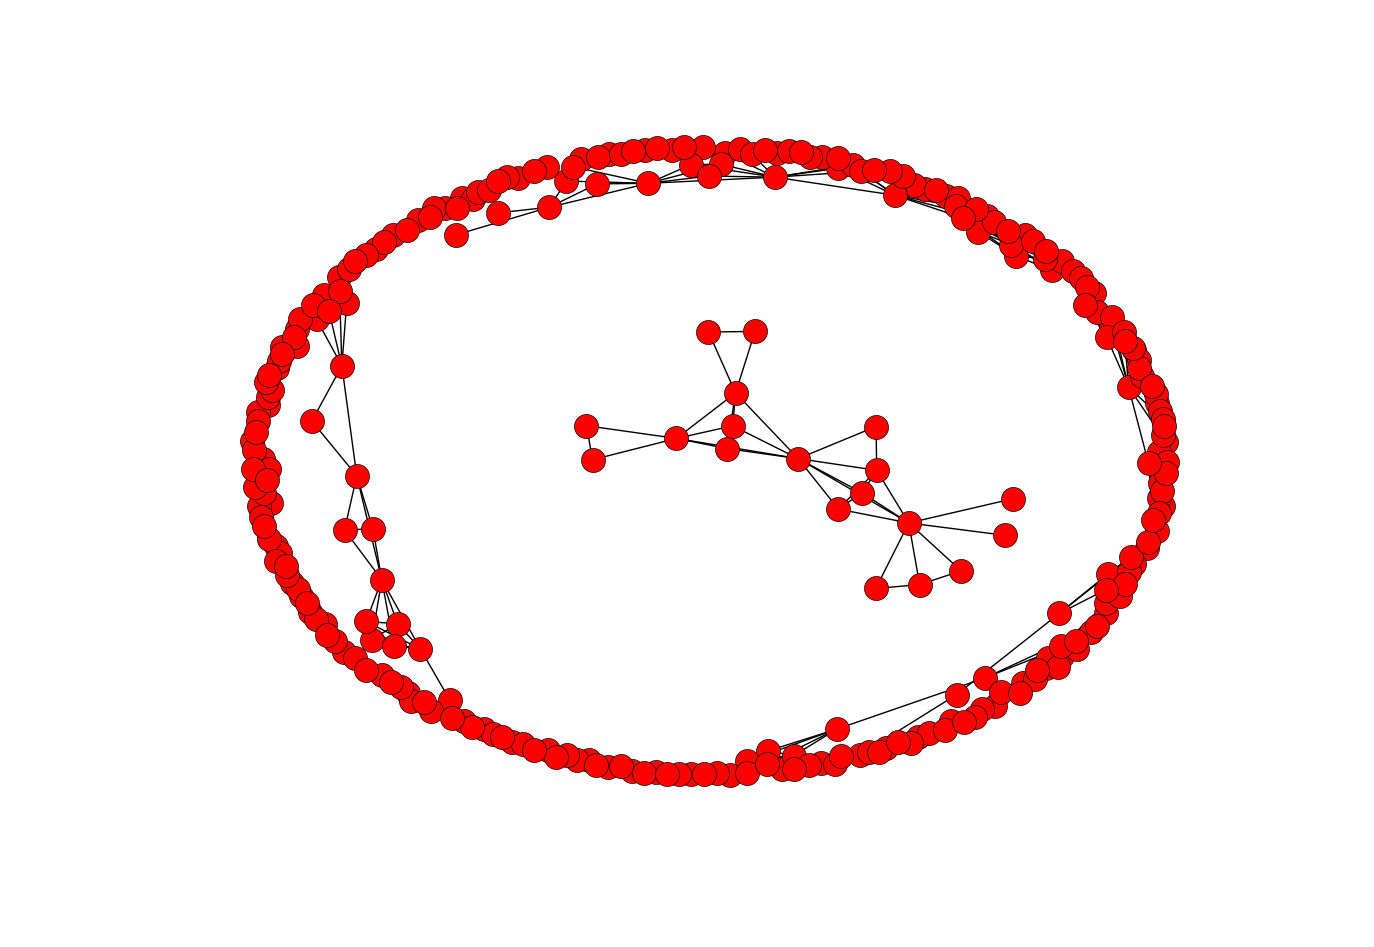

In [62]:
nx.draw(G)

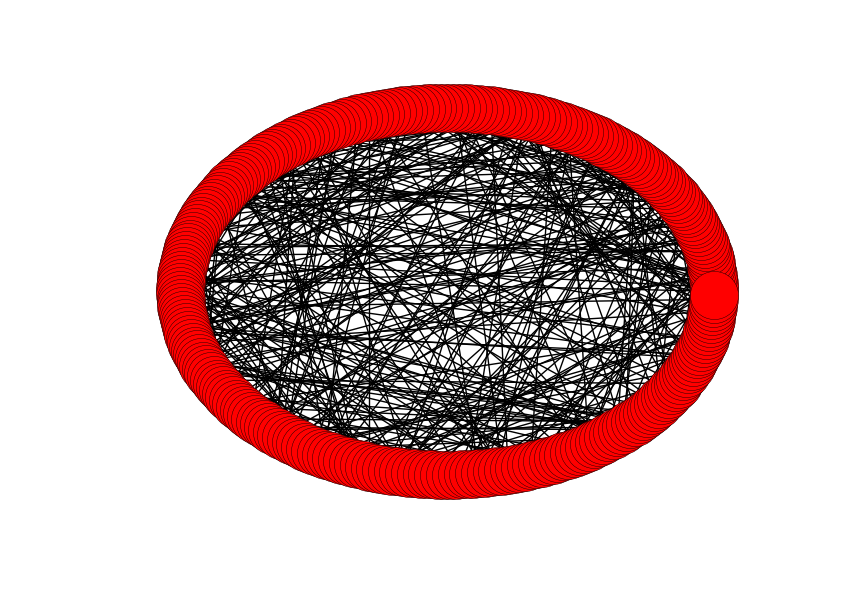

In [18]:
nx.draw_circular(G, node_size=1200, figsize=(100,50))

As we can see from the above graph this network is too large to deduce much about the data. We can immediately see that not all nodes are connected to an node showing we have a few islands. 

In [19]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 286
Number of edges: 410
Average degree:   2.8671


The average investigator is connected to 2-3 other investigators. 

# Calculate the degree centrality of the top 25 investigators

In [20]:
dict_degree = G.degree()
df_degree = pd.DataFrame.from_dict(dict_degree, orient='index')
df_degree.columns=['degree']
df_degree.index.name = 'Investigator'

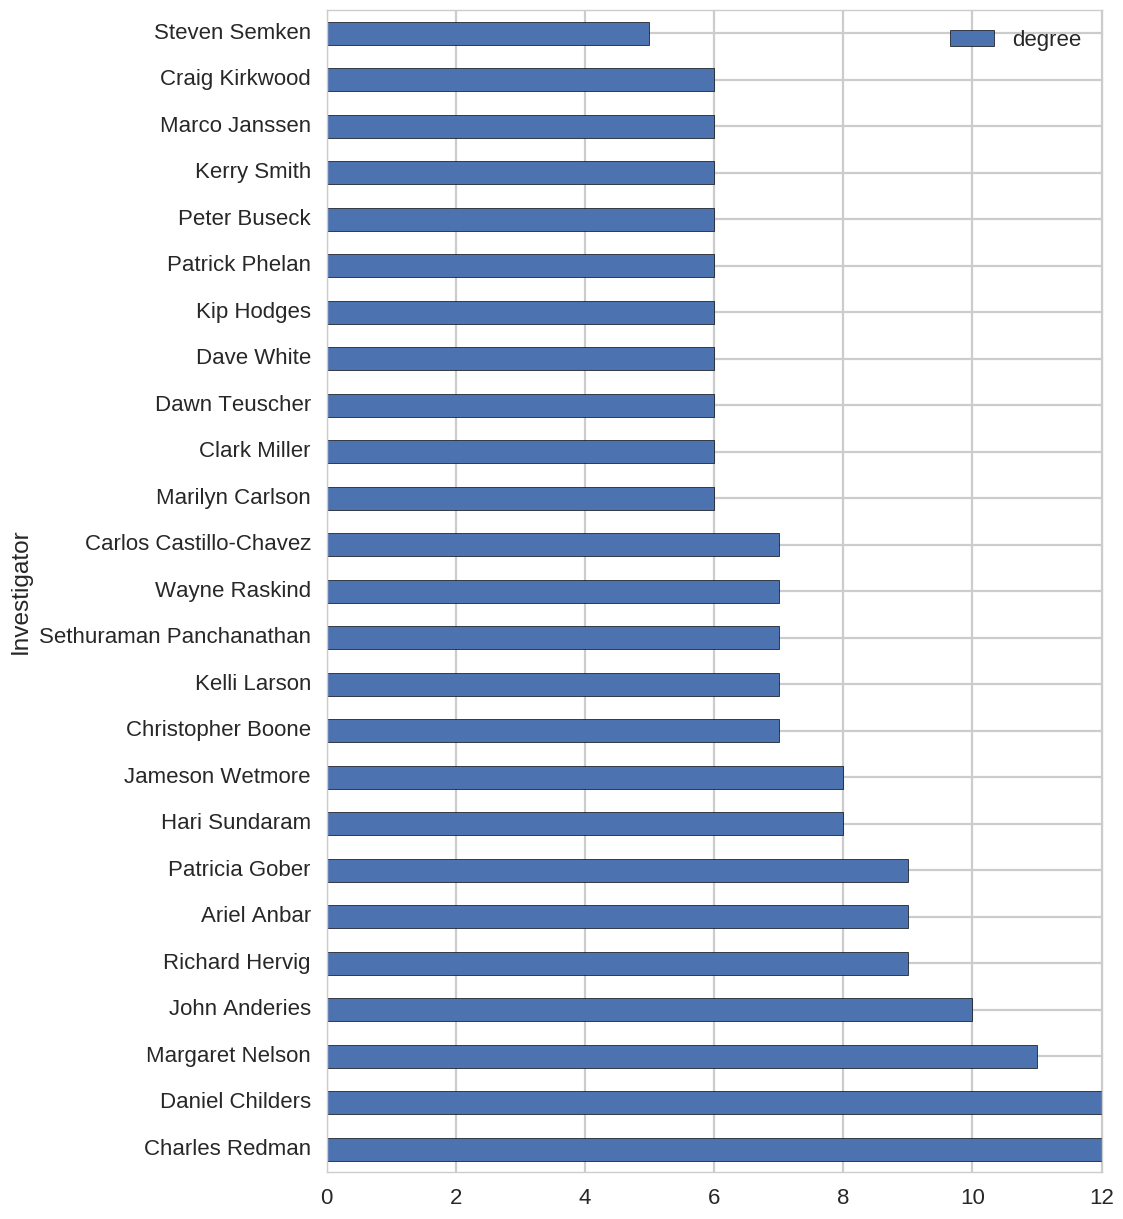

In [21]:
import seaborn as sns
N_INVESTIGATORS = 25
sns.set_style("whitegrid")
plt.figure(figsize=(22, 12))
sns.set_context("poster", font_scale=1.00, rc={"lines.linewidth": 1.00,"lines.markersize":8})
df_degree.sort_values(by='degree', ascending=False)[:N_INVESTIGATORS].plot(kind='barh', figsize=(10,15))

In [22]:
df_network.query('FullName_x == "Daniel Childers"').AwardTitle_x.unique().shape

(5,)

Our top investigator is a (co)-PI on 5 NSF grants which explains his high degree centrality.

## Histogram of number of connections each investigator has 

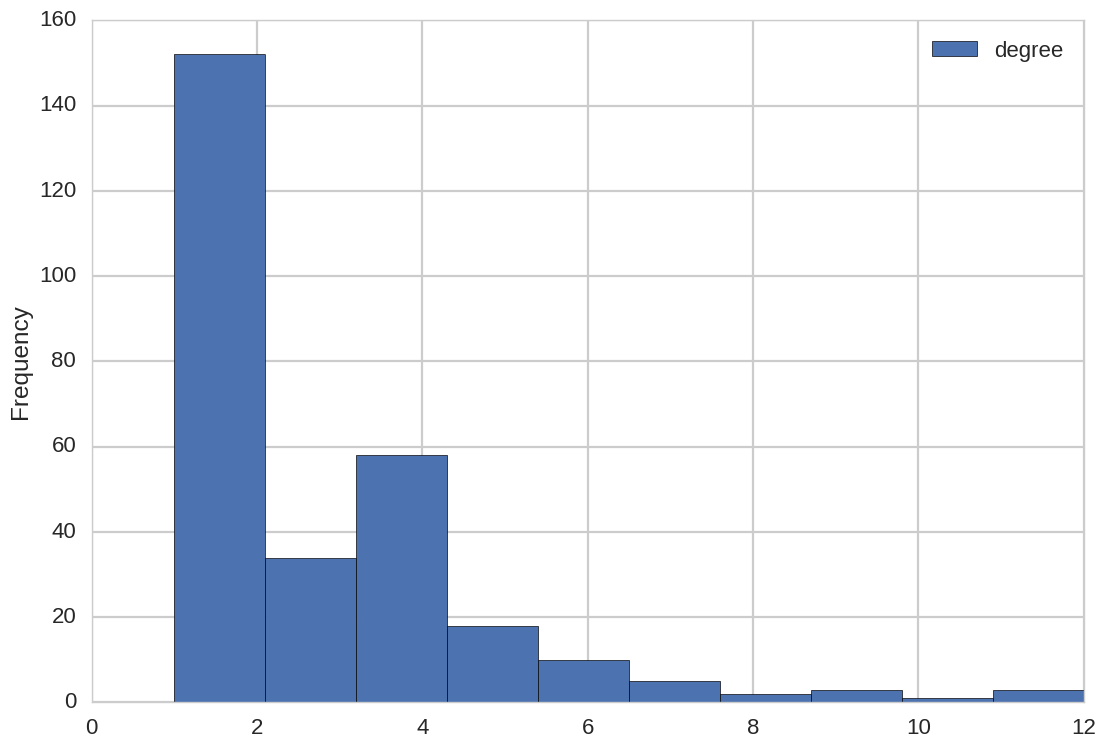

In [23]:
df_degree.sort_values(by='degree', ascending=False).plot(kind='hist')

From the barplot and histogram we can see that the most edges an one investigator has is 12. The distribution of degree centrality is high skewed with most investigators being linked by 1 to 3 edges, meaning at typical collaboration involves 1 to 2 people. This likely indicates that 1-3 are typically the amount that write proposals and collaborate together. Larger collaborations are likely harder to get funded and are thus harder to find. 

# Betweeness Centrality


In [24]:
dict_betweenness_centrality = nx.betweenness_centrality(G)
df_betweenness_centrality = pd.DataFrame.from_dict(dict_betweenness_centrality,
                                                 orient='index')
df_betweenness_centrality.columns=['betweeness_centrality']
df_betweenness_centrality.index.name = 'Investigator'

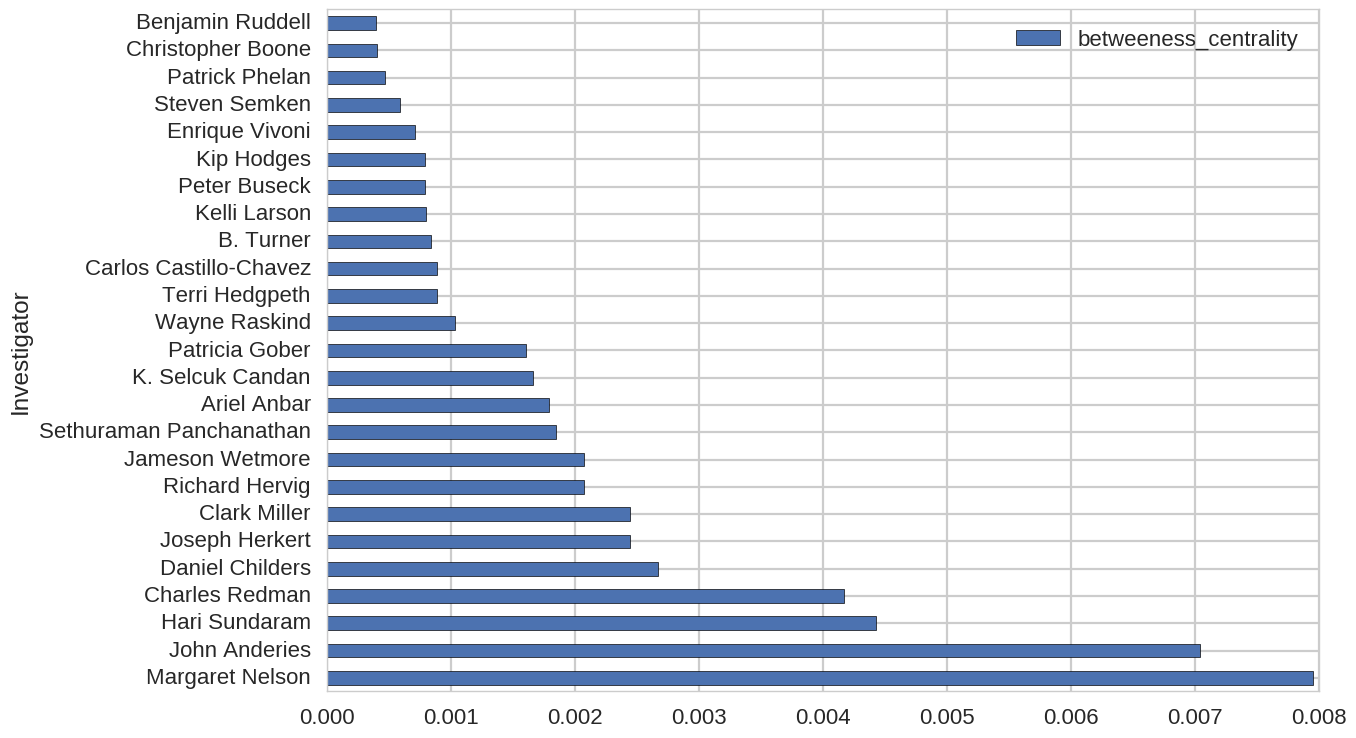

In [25]:
df_betweenness_centrality.sort_values(by='betweeness_centrality',
                                   ascending=False)[:N_INVESTIGATORS].plot(kind='barh')

First we should notice that a max value of 0.008 is quite small. This indicates that our network is quite unconected and very little flow throughout the network. In an academic setting this is to be expected as faculty are largely divided by department. Also, faculty can typically only have a few high quality collaborations with others that are likely in their discipline. 

# Cliques


In [26]:
cliques = list(nx.find_cliques(G))


In [27]:
import functools
#summary stats of cliques
num_cliques = len(cliques)
ls_len_cliqs = [len(cliq) for cliq in cliques ]
max_clique_size = max(ls_len_cliqs)
avg_clique_size = np.mean(ls_len_cliqs)
max_cliques = [c for c in cliques if len(c) == max_clique_size]
max_clique_sets = [set(c) for c in max_cliques]
people_in_max_cliques = list(functools.reduce(lambda x,y: x.intersection(y), max_clique_sets))

In [28]:
print(num_cliques)
print(max_clique_size)
print(avg_clique_size)

126
7
2.87301587302


In [29]:
max_cliques

[['Margaret Nelson',
  'Craig Kirkwood',
  'Kelli Larson',
  'Kerry Smith',
  'Dave White',
  'Patricia Gober',
  'Charles Redman']]

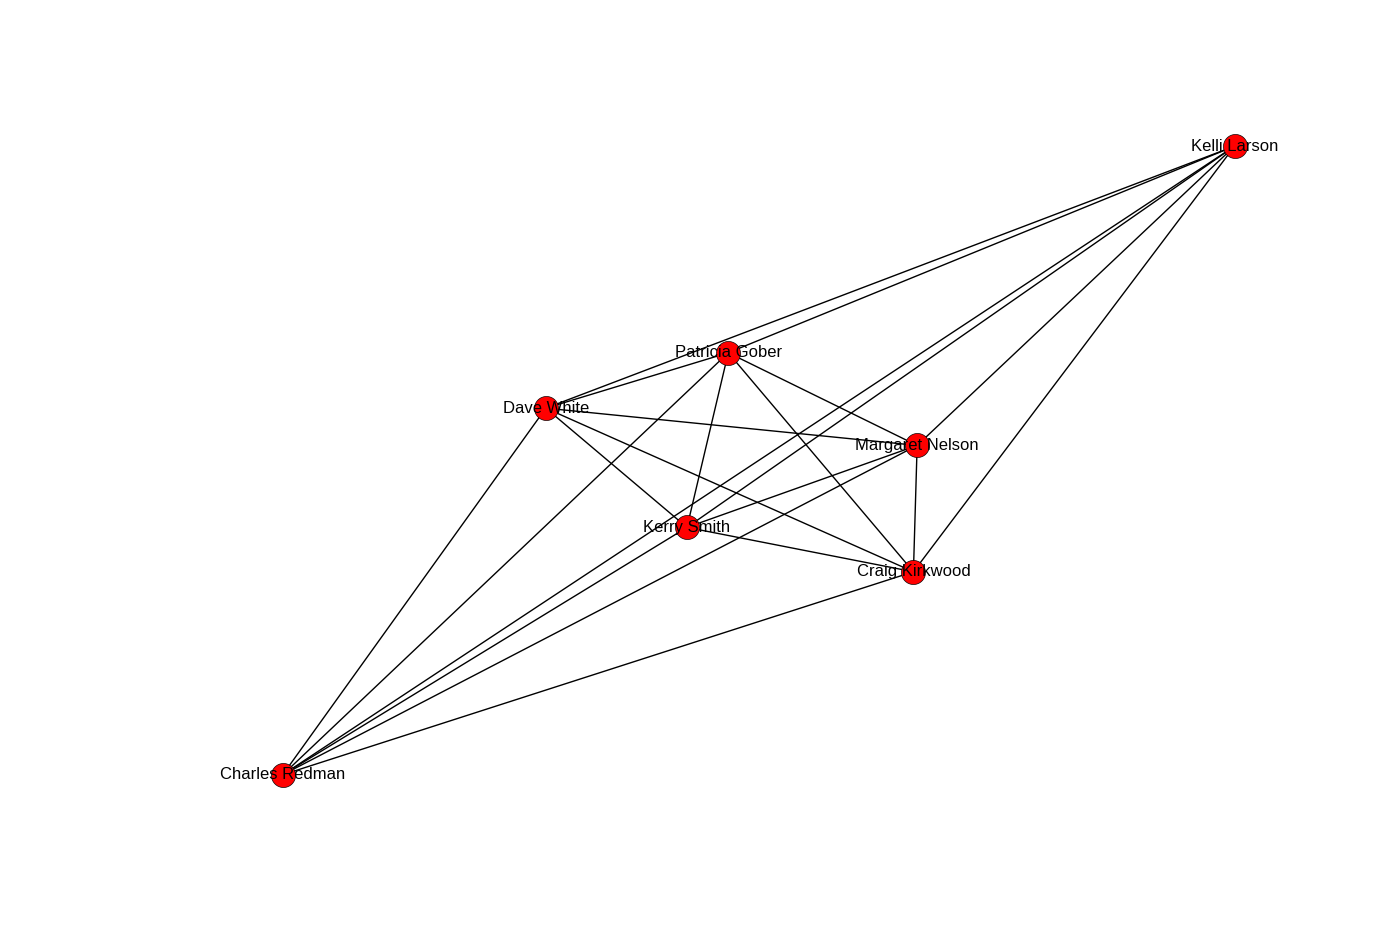

In [30]:
Graph_max_clique1 = G.subgraph(max_cliques[0])
nx.draw(Graph_max_clique1, with_labels=True)

This clique is likely all the PIs on a single grant. All cliques will likely reveal the same information. 

In [31]:
df_network.query('FullName_x == "Craig Kirkwood"')

,AwardId,FullName_x,AwardTitle_x,FullName_y,AwardTitle_y
173,951366,Craig Kirkwood,DMUU: Decision Center for a Desert City II: Ur...,Charles Redman,DMUU: Decision Center for a Desert City II: Ur...
174,951366,Craig Kirkwood,DMUU: Decision Center for a Desert City II: Ur...,Patricia Gober,DMUU: Decision Center for a Desert City II: Ur...
175,951366,Craig Kirkwood,DMUU: Decision Center for a Desert City II: Ur...,Margaret Nelson,DMUU: Decision Center for a Desert City II: Ur...
176,951366,Craig Kirkwood,DMUU: Decision Center for a Desert City II: Ur...,Kelli Larson,DMUU: Decision Center for a Desert City II: Ur...
177,951366,Craig Kirkwood,DMUU: Decision Center for a Desert City II: Ur...,Dave White,DMUU: Decision Center for a Desert City II: Ur...
179,951366,Craig Kirkwood,DMUU: Decision Center for a Desert City II: Ur...,Kerry Smith,DMUU: Decision Center for a Desert City II: Ur...
